In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Gradient Boosting Regressor with O/P visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

# Load the dataset into a Pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/CIP/Price_Sorted_Modified.csv')

# Encode categorical features
le_district = LabelEncoder()
df['District'] = le_district.fit_transform(df['District'])
le_crop = LabelEncoder()
df['Crop'] = le_crop.fit_transform(df['Crop'])

# Convert 'Price Date' column to datetime format
df['Price Date'] = pd.to_datetime(df['Price Date'], format='%b-%Y')

# Extract month and year from 'Price Date' column
df['Month'] = df['Price Date'].dt.month
df['Year'] = df['Price Date'].dt.year

# Drop the 'Price Date' column
df = df.drop('Price Date', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['District', 'Crop', 'Month', 'Year']], df['Crop Price (Rs per quintal)'], test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
params = {
    'n_estimators': [100, 150, 250],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'alpha': [0.1, 0.4, 0.7]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters : ", best_params)

# Train the model on the training set with the best parameters
gbr = GradientBoostingRegressor(**best_params)
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error : {:.2f}".format(mse))
print("Root Mean Squared Error : {:.2f}".format(rmse))
print("Mean Absolute Error : {:.2f}".format(mae))

Best parameters :  {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Mean Squared Error : 3655.43
Root Mean Squared Error : 60.46
Mean Absolute Error : 51.25


Mean Squared Error : 3668.13
Root Mean Squared Error : 60.57
Mean Absolute Error : 51.49
R2 Score : 1.00


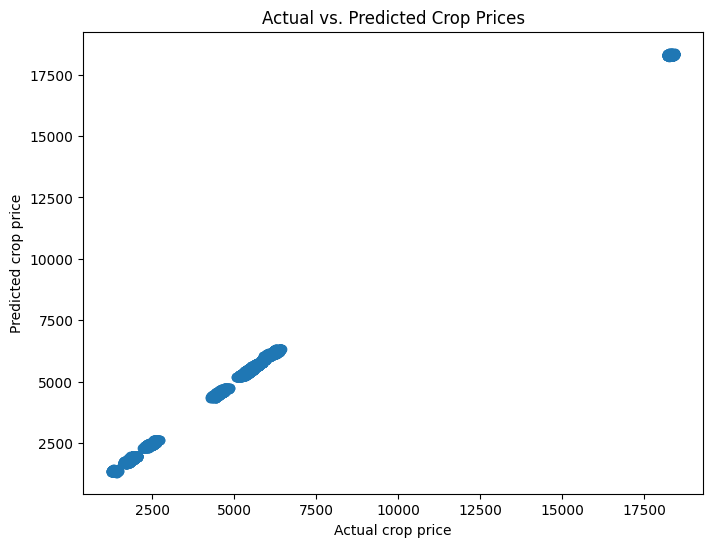

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset into a Pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/CIP/Price_Sorted_Modified.csv')

# Encode categorical features
le_district = LabelEncoder()
df['District'] = le_district.fit_transform(df['District'])
le_crop = LabelEncoder()
df['Crop'] = le_crop.fit_transform(df['Crop'])

# Convert 'Price Date' column to datetime format
df['Price Date'] = pd.to_datetime(df['Price Date'], format='%b-%Y')

# Extract month and year from 'Price Date' column
df['Month'] = df['Price Date'].dt.month
df['Year'] = df['Price Date'].dt.year

# Drop the 'Price Date' column
df = df.drop('Price Date', axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['District', 'Crop', 'Month', 'Year']], df['Crop Price (Rs per quintal)'], test_size=0.2, random_state=42, stratify=df['Crop'])

# Add some random noise to y_train
np.random.seed(42)
noise = np.random.normal(0, 1, size=y_train.shape[0])
y_train = y_train + noise

# Handle missing values
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model on the training set with the best parameters
gbr = GradientBoostingRegressor(n_estimators=150, max_depth=8, learning_rate=0.05, alpha=0.8, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error : {:.2f}".format(mse))
print("Root Mean Squared Error : {:.2f}".format(rmse))
print("Mean Absolute Error : {:.2f}".format(mae))
print("R2 Score : {:.2f}".format(r2))

# Visualize the predicted and actual crop prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual crop price")
plt.ylabel("Predicted crop price")
plt.title("Actual vs. Predicted Crop Prices")
plt.show()